In [1]:
#pandas
import pandas as pd 

#tensorflow
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns 

#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#regular expression
import re

In [3]:
df = pd.read_csv('F:\spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.rename({'v1':'label','v2':'text'},inplace=True,axis=1)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape 

(5572, 2)

In [7]:
df.isnull().sum()


label    0
text     0
dtype: int64

In [8]:
X = df.drop('label',axis=1)
y = df.label

In [9]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
voc_size = 3000


In [11]:
messages = X.copy()


In [12]:
messages.reset_index(inplace=True)
messages.head()

,index,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,U dun say so early hor... U c already then say...
4,4,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
ps = PorterStemmer()

corpus = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [17]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]


In [18]:
corpus[0]


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [19]:
onehot_repr[0]


[753,
 986,
 1847,
 2176,
 722,
 754,
 182,
 935,
 1853,
 2535,
 29,
 1329,
 2646,
 1228,
 359,
 1373]

In [20]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1228  359 1373]
 [   0    0    0 ... 2367 2451  130]
 [2207 2666 2364 ... 1854 2257 1003]
 ...
 [   0    0    0 ...   26  430 2192]
 [   0    0    0 ...  350 2338  640]
 [   0    0    0 ... 1132  498 1724]]


In [21]:
embedding_vector_feature = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_featussre,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            120000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 176,501
Trainable params: 176,501
Non-trainable params: 0
_________________________________________________________________


In [23]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [24]:
X_final.shape,y_final.shape

((5572, 20), (5572,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)


Epoch 1/10
59/59 [==============================] - 4s 27ms/step - loss: 0.3274 - accuracy: 0.8752 - val_loss: 0.1613 - val_accuracy: 0.9630
Epoch 2/10
59/59 [==============================] - 1s 19ms/step - loss: 0.0942 - accuracy: 0.9794 - val_loss: 0.0774 - val_accuracy: 0.9788
Epoch 3/10
59/59 [==============================] - 1s 19ms/step - loss: 0.0413 - accuracy: 0.9879 - val_loss: 0.0709 - val_accuracy: 0.9799
Epoch 4/10
59/59 [==============================] - 1s 21ms/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.0812 - val_accuracy: 0.9804
Epoch 5/10
59/59 [==============================] - 1s 17ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0761 - val_accuracy: 0.9821
Epoch 6/10
59/59 [==============================] - 1s 18ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.0744 - val_accuracy: 0.9826
Epoch 7/10
59/59 [==============================] - 1s 18ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0911 - val_accuracy: 0.9810
Epoch 8/10
59

In [27]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)

58/58 [==============================] - 1s 5ms/step


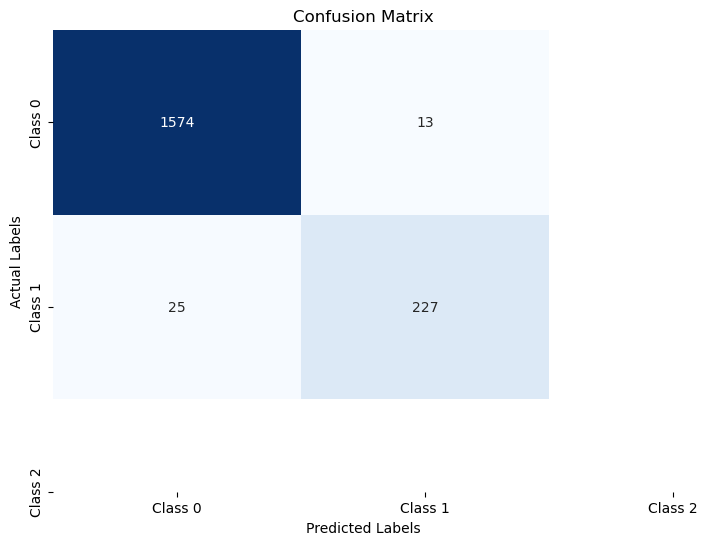

In [28]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1587
           1       0.95      0.90      0.92       252

    accuracy                           0.98      1839
   macro avg       0.97      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [51]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.9793365959760739


In [37]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Create a pipeline with RandomForestClassifier
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # You can adjust n_estimators as needed
])

# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

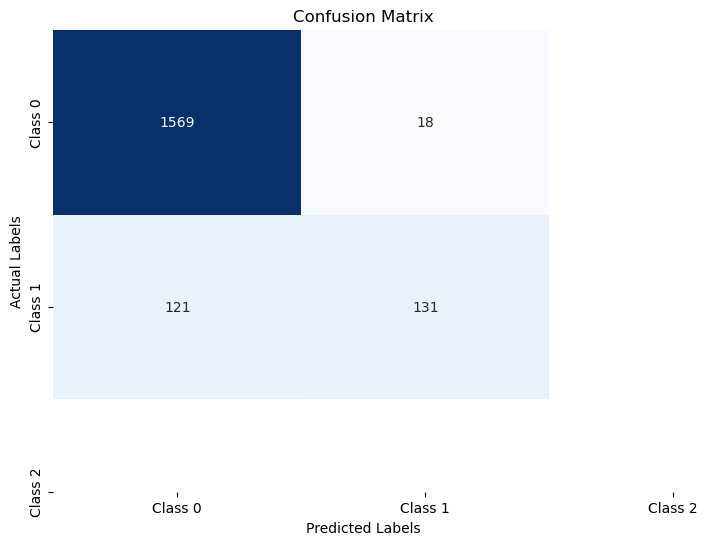

In [40]:
# Predict on the test data
y_pred_rf = pipeline_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [41]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1587
           1       0.88      0.52      0.65       252

    accuracy                           0.92      1839
   macro avg       0.90      0.75      0.81      1839
weighted avg       0.92      0.92      0.92      1839



In [50]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_rf))

Accuracy Score: 0.924415443175639


In [45]:

pipeline_rf1 = Pipeline([
    ('classifier', MultinomialNB ())  # You can adjust n_estimators as needed
])

In [46]:
# Fit the pipeline on the training data
pipeline_rf1.fit(X_train, y_train)

Pipeline(steps=[('classifier', MultinomialNB())])

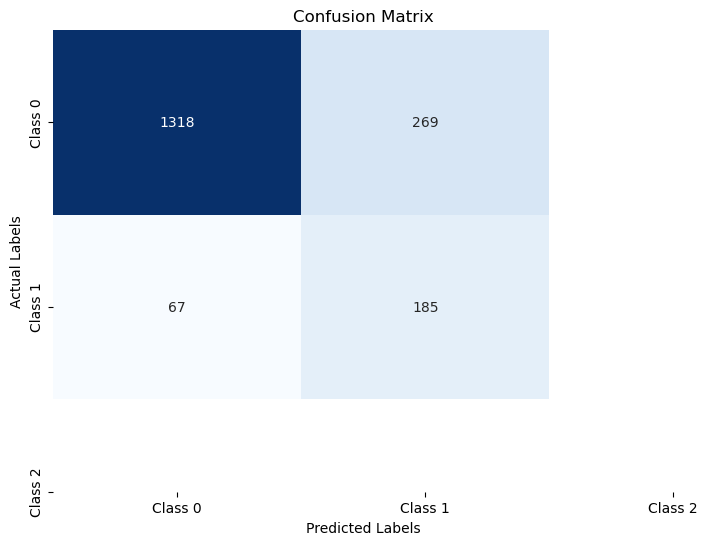

In [47]:
# Predict on the test data
y_pred_rf1 = pipeline_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [48]:
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1587
           1       0.41      0.73      0.52       252

    accuracy                           0.82      1839
   macro avg       0.68      0.78      0.71      1839
weighted avg       0.88      0.82      0.84      1839



In [49]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_rf1))

Accuracy Score: 0.8172920065252854


In [54]:
pipeline_rf2 = Pipeline([
    ('classifier',LogisticRegression())
])

In [55]:
pipeline_rf2.fit(X_train, y_train)

Pipeline(steps=[('classifier', LogisticRegression())])

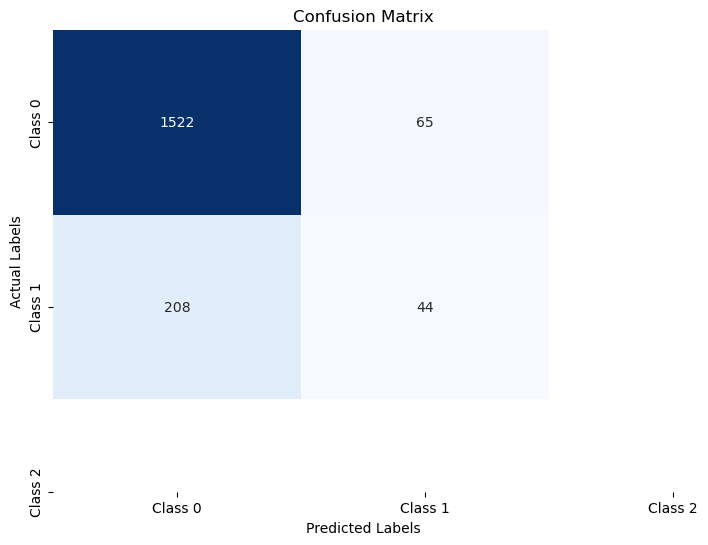

Accuracy Score: 0.8515497553017944


In [61]:
y_pred_rf2 = pipeline_rf2.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()
print('Accuracy Score:',accuracy_score(y_test,y_pred_rf2))

In [62]:
print(classification_report(y_test,y_pred_rf2))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1587
           1       0.40      0.17      0.24       252

    accuracy                           0.85      1839
   macro avg       0.64      0.57      0.58      1839
weighted avg       0.81      0.85      0.83      1839



In [63]:
pipeline_rf3 = Pipeline([
    ('classifier',SVC())
])

In [64]:
pipeline_rf3.fit(X_train, y_train)

Pipeline(steps=[('classifier', SVC())])

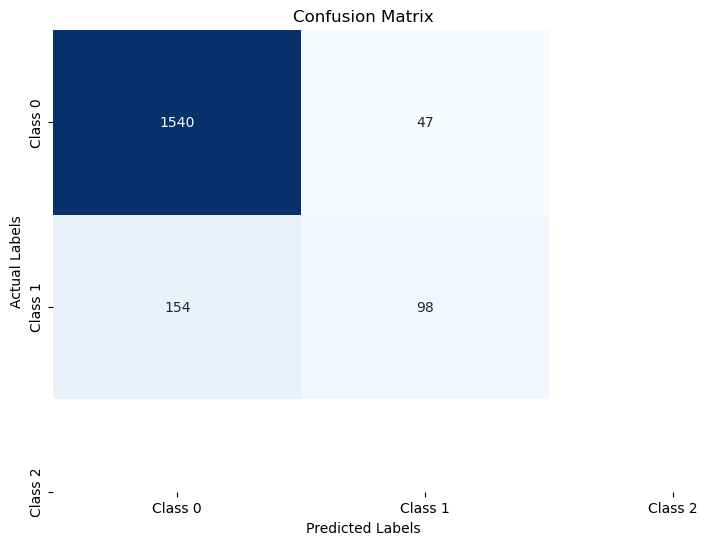

Accuracy Score: 0.8907014681892332


In [65]:
y_pred_rf3 = pipeline_rf3.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()
print('Accuracy Score:',accuracy_score(y_test,y_pred_rf3))

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import string 
def text_process(messages):
    nopunc = [char for char in messages if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [79]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001EEF34C35E0>)

In [80]:
bow_transformer.fit(messages['text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 11304


In [81]:
bow_reviews = bow_transformer.transform(messages['text'])

In [83]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)


In [84]:
review_train, review_test, label_train, label_test = train_test_split(df['text'],df['label'],test_size=0.35)

In [85]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [86]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001EEF34C35E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [88]:
predictions = pipeline.predict(review_test)
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [89]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1681
        spam       1.00      0.63      0.77       270

    accuracy                           0.95      1951
   macro avg       0.97      0.81      0.87      1951
weighted avg       0.95      0.95      0.94      1951

Confusion Matrix: [[1681    0]
 [ 100  170]]
Accuracy Score: 0.9487442337262942


In [90]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 94.87%


In [91]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [92]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001EEF34C35E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [93]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [94]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1681
        spam       0.99      0.72      0.84       270

    accuracy                           0.96      1951
   macro avg       0.98      0.86      0.91      1951
weighted avg       0.96      0.96      0.96      1951

Confusion Matrix: [[1680    1]
 [  75  195]]
Accuracy Score: 0.9610456176319836
Model Prediction Accuracy: 96.1%


In [95]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [96]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001EEF34C35E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [97]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [98]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.96      0.99      0.98      1681
        spam       0.93      0.75      0.83       270

    accuracy                           0.96      1951
   macro avg       0.94      0.87      0.90      1951
weighted avg       0.96      0.96      0.96      1951

Confusion Matrix: [[1665   16]
 [  67  203]]
Accuracy Score: 0.9574577139928242
Model Prediction Accuracy: 95.75%


In [99]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [100]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001EEF34C35E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [102]:
knn_pred = pipeline.predict(review_test)
knn_pred

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [103]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.91      1.00      0.95      1681
        spam       1.00      0.36      0.52       270

    accuracy                           0.91      1951
   macro avg       0.95      0.68      0.74      1951
weighted avg       0.92      0.91      0.89      1951

Confusion Matrix: [[1681    0]
 [ 174   96]]
Accuracy Score: 0.910814966683752
Model Prediction Accuracy: 91.08%


In [104]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [105]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001EEF34C35E0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [106]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [107]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1681
        spam       0.99      0.74      0.85       270

    accuracy                           0.96      1951
   macro avg       0.97      0.87      0.91      1951
weighted avg       0.96      0.96      0.96      1951

Confusion Matrix: [[1678    3]
 [  70  200]]
Accuracy Score: 0.9625832906201948
Model Prediction Accuracy: 96.26%


In [108]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [109]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001EEF34C35E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [110]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [111]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

         ham       0.93      1.00      0.97      1681
        spam       0.99      0.56      0.72       270

    accuracy                           0.94      1951
   macro avg       0.96      0.78      0.84      1951
weighted avg       0.94      0.94      0.93      1951

Confusion Matrix: [[1680    1]
 [ 118  152]]
Accuracy Score: 0.93900563813429
Model Prediction Accuracy: 93.9%


In [112]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 93.9%
K Nearest Neighbors Prediction Accuracy: 91.08%
Decision Tree Classifier Prediction Accuracy: 95.75%
Random Forests Classifier Prediction Accuracy: 96.1%
Support Vector Machines Prediction Accuracy: 96.26%
Multinomial Naive Bayes Prediction Accuracy: 94.87%
